In [103]:
import pandas as pd
import numpy as np

In [104]:
df=pd.read_csv('/content/canada_per_capita_income.csv')

In [105]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [106]:
df.isna().sum()

,0
year,0
per capita income (US$),0


In [107]:
df.head(25)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [108]:
print(df['per capita income (US$)'].describe())

count       47.000000
mean     18920.137063
std      12034.679438
min       3399.299037
25%       9526.914515
50%      16426.725480
75%      27458.601420
max      42676.468370
Name: per capita income (US$), dtype: float64


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
X=df['year'].values.reshape(-1, 1)
Y=df['per capita income (US$)']
xtrain, xtest, ytrain, ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [111]:
model = LinearRegression()
model.fit(xtrain,ytrain)


LinearRegression()

In [112]:
ypred = model.predict(xtest)
r2 = r2_score(ytest, ypred)
print(f"R2 Score: {r2:.2f}")

R2 Score: 0.88


In [113]:
ans=model.predict([[2020]])
print(ans)

[41027.67748165]


## without sklearn

In [114]:
X_flat = X.flatten() # Convert X to 1D for manual calculation
mean_x=np.mean(X_flat)
mean_y=np.mean(Y)
n=len(X_flat)
numerator = np.sum((X_flat - mean_x) * (Y - mean_y))
denominator = np.sum((X_flat - mean_x)**2)
m = numerator / denominator
c = mean_y - (m * mean_x)

print(f"Estimated slope (m): {m}")
print(f"Estimated intercept (c): {c}")
y_pred_manual = c + m * 2020
print(f"Manual prediction for 2020: {y_pred_manual:.2f}")

Estimated slope (m): 828.4650752227103
Estimated intercept (c): -1632210.7578554573
Manual prediction for 2020: 41288.69


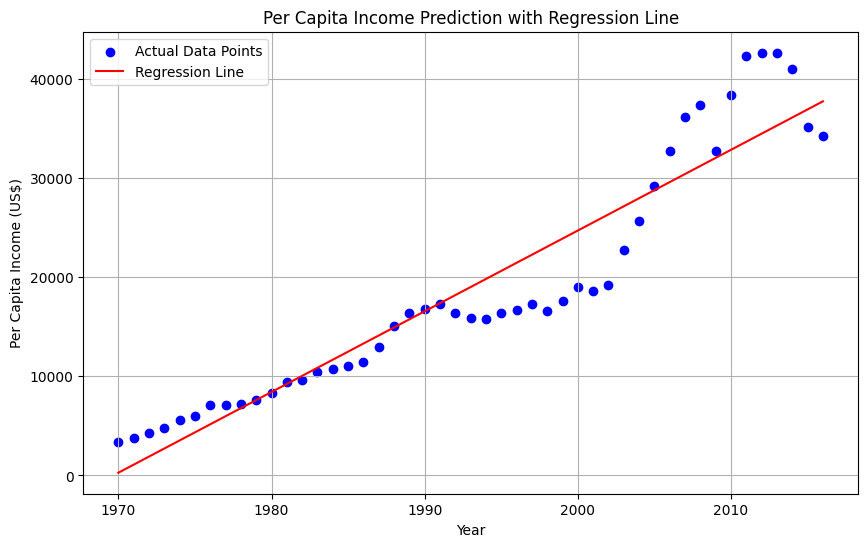

In [115]:
import matplotlib.pyplot as plt
sorted_df = df.sort_values(by='year')
X_plot = sorted_df['year'].values.reshape(-1, 1)
Y_plot = sorted_df['per capita income (US$)']
y_pred_line = model.predict(X_plot)
plt.figure(figsize=(10, 6))
plt.scatter(X_plot, Y_plot, color='blue', label='Actual Data Points')
plt.plot(X_plot, y_pred_line, color='red', label='Regression Line')

plt.title('Per Capita Income Prediction with Regression Line')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.legend()
plt.grid(True)
plt.show()

## Hiring.csv

In [116]:
df=pd.read_csv('/content/hiring.csv')
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [117]:
(df['experience'] == 0).any()

np.False_

In [118]:
df.isna().sum()

,0
experience,2
test_score(out of 10),1
interview_score(out of 10),0
salary($),0


In [119]:
df = df.dropna()

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [121]:
print(df)

  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
7     eleven                    7.0                           8      80000


In [122]:
mapping = {
    "zero": 0,
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "seven": 7,
    "eight": 8,
    "nine": 9,
    "ten": 10,
    "eleven": 11,
    "twelve": 12
}

df['experience'] = df['experience'].map(mapping)
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
7,11,7.0,8,80000


In [123]:
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df['salary($)']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(xtrain, ytrain)


LinearRegression()

In [124]:
new_candidate_data = pd.DataFrame({
    'experience': [12],
    'test_score(out of 10)': [10],
    'interview_score(out of 10)': [10]
})

predicted_salary = model.predict(new_candidate_data)
print(f"Predicted salary for a candidate with 12 years experience, 10 test score, and 10 interview score: ${predicted_salary[0]:,.2f}")

Predicted salary for a candidate with 12 years experience, 10 test score, and 10 interview score: $92,562.50
